# Unemployment Analysis 
## 1.Problem Definition
* The Task is to analyse how the unemployment rate increases by observing various features.
## 2.Data
* The data has been collected from Kaggle : "https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india"
* The Dataset contains 768 samples.
### Features
* There are 7 features in the dataset.
* They are
  1. Region
  2. Date
  3. Frequency
  4. Estimated Unemployment rate
  5. Estimated Employed
  6. Estimated Labour Participation Rate
  7. Area

### Importing Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Unemployment in India.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data.shape

(768, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### Exploratory Data Analysis

In [11]:
data["Region"].nunique()

28

In [12]:
data["Area"].unique()

array(['Rural', 'Urban'], dtype=object)

In [13]:
# plt.figure(figsize=(10,6))
# plt.bar(x=data['Region'].unique(),y=data['Estimated Unemployment Rate(%)'])

In [14]:
corr = data.corr(numeric_only=True)
corr

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

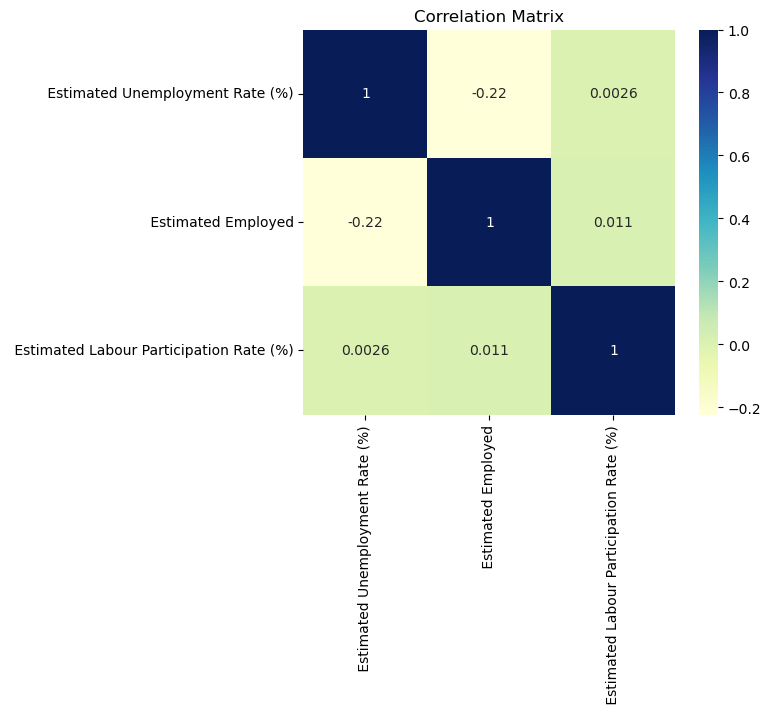

In [15]:
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title("Correlation Matrix")

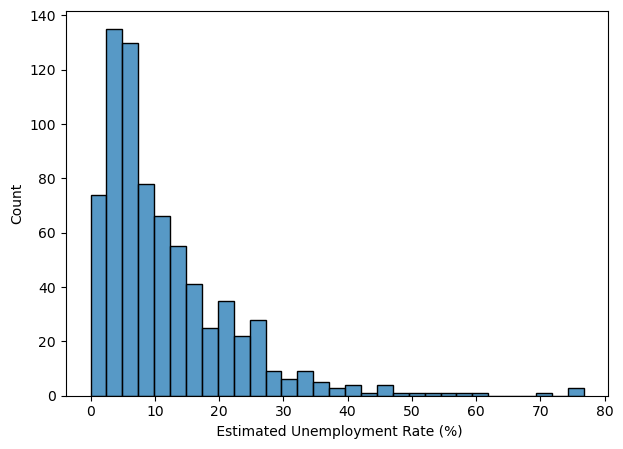

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(data[' Estimated Unemployment Rate (%)']);

Text(0.5, 1.0, 'Percentage of Rural and Urban')

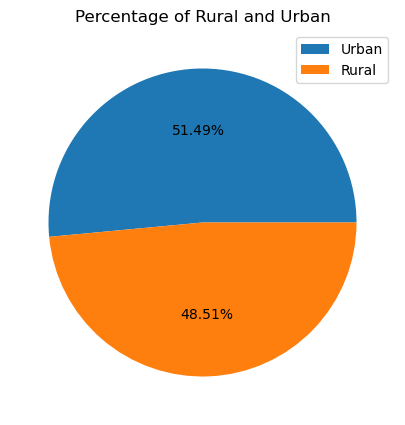

In [17]:
plt.figure(figsize=(6,5))
plt.pie(data["Area"].value_counts(),autopct="%.2f%%")
plt.legend(labels=data["Area"].value_counts().index)
plt.title("Percentage of Rural and Urban")

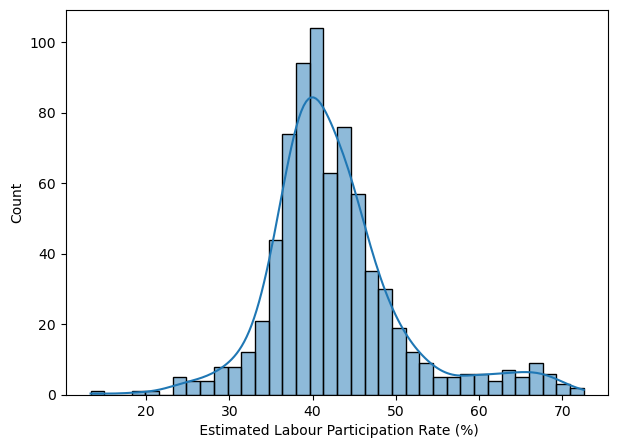

In [18]:
plt.figure(figsize=(7,5))
sns.histplot(data[' Estimated Labour Participation Rate (%)'],kde=True);

In [19]:
# plt.figure(figsize=(7,5))
# # #plt.bar(data[' Estimated Labour Participation Rate (%)'],kde=True);
# # plt.bar(data, x = 'Region', y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
# # update_layout(xaxis = {'categoryorder':'total descending'})
# # plt.show()

# sns.barplot(data,x=data["Region"],y=data[' Estimated Unemployment Rate(%)'].

<Figure size 1500x700 with 0 Axes>

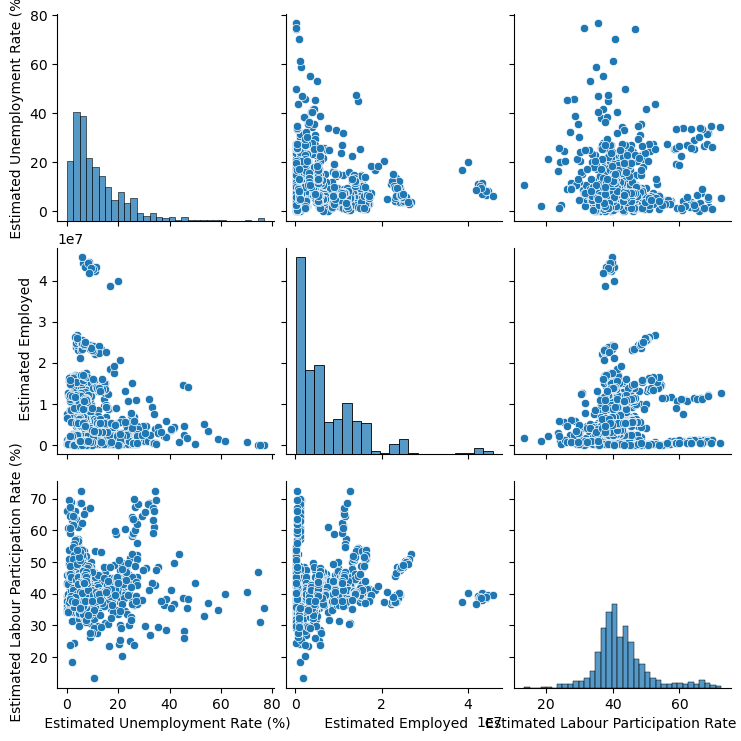

In [20]:
plt.figure(figsize=(15,7))
sns.pairplot(data=data)

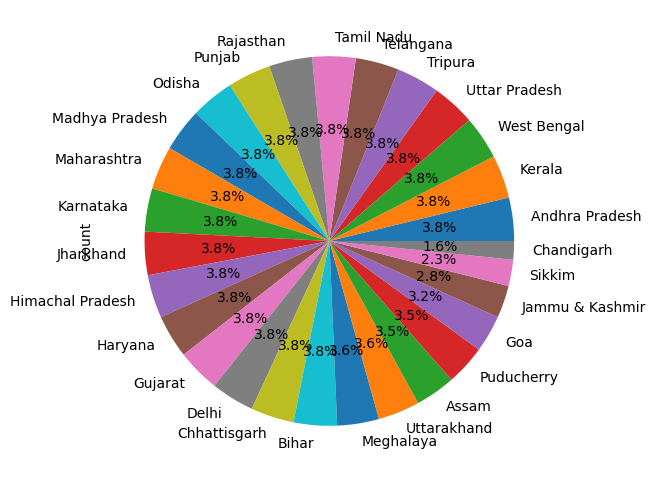

In [36]:
plt.figure(figsize=(13,6))
data['Region'].value_counts().plot.pie(autopct='%.1f%%');

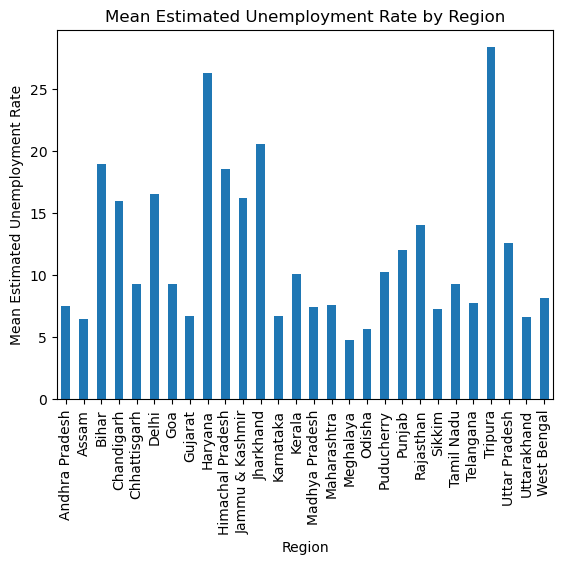

In [30]:
data_s= data[['Region', ' Estimated Unemployment Rate (%)']]
data_com = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
data_com.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.show()

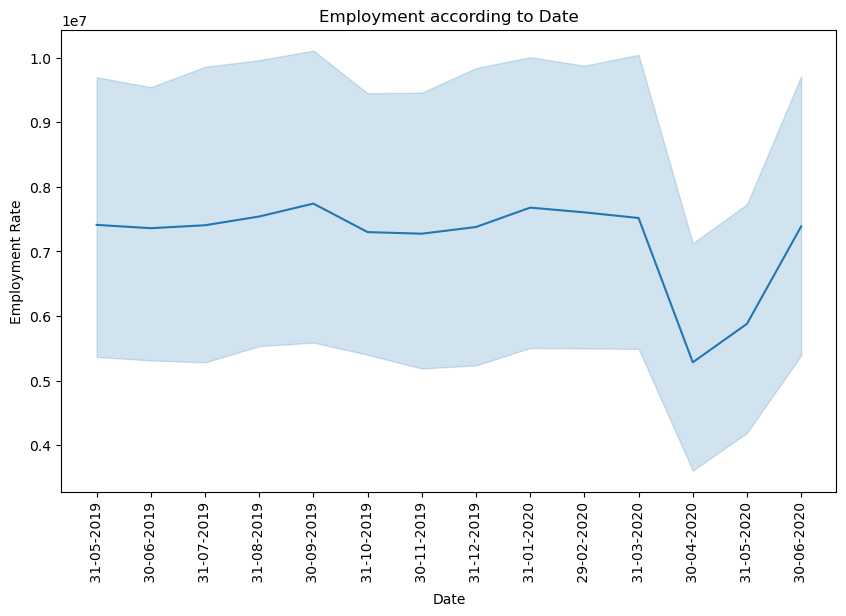

In [39]:
plt.figure(figsize = (10, 6))
sns.lineplot(y=' Estimated Employed', x=' Date', data=data)
plt.title('Employment according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Employment Rate')
plt.show()